In [ ]:
from functools import reduce
import matplotlib.pyplot as plt

Point = tuple[int, int]

# this is scuffed, the types are all wrong, but idc
with open('14.txt', 'r') as f:
  data: list[list[tuple[int, ...]]] = [
    [tuple(map(int, b.split('=')[1].split(','))) for b in v.split(' ')] for v in f.read().split('\n')]

width = 101
height = 103

h_mid: int = (width-1)//2
v_mid: int = (height-1)//2
safety_factors: list[int] = []
points: list[list[Point]] = []

for i in range(width*height):
  ps: list[Point] = []
  quadrants: list[int] = [0, 0, 0, 0]
  for j, d in enumerate(data):
    point: Point = Point(d[0]) 
    slope: Point = Point(d[1])
    point: Point = ((point[0] + slope[0])%width, (point[1] + slope[1])%height)
    d[0] = point
    ps.append(point)

    x: int = point[0]
    y: int = point[1]
    if x < h_mid and y < v_mid: quadrants[0] += 1
    elif x > h_mid and y < v_mid: quadrants[1] += 1
    elif x < h_mid and y > v_mid: quadrants[2] += 1
    elif x > h_mid and y > v_mid: quadrants[3] += 1 

  points.append(ps)
  sf: int = reduce(lambda x, y: x*y, quadrants)
  safety_factors.append(sf)

i: int = safety_factors.index(min(safety_factors))
i

7519

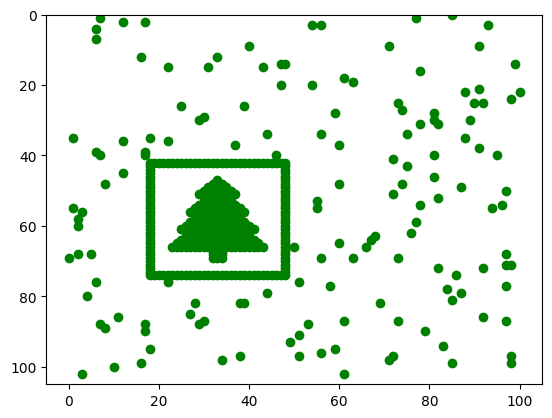

In [169]:
# plot the tree for funsies

x: list[int] = [p[0] for p in points[i]]
y: list[int] = [p[1] for p in points[i]]

plt.ylim(105, 0)
plt.scatter(x, y, c='green')